In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from itertools import product
import matplotlib.pyplot as plt

In [2]:
years_to_process = range(1980, 2022 + 1)

In [3]:
plad = pd.read_table("/scicore/home/meiera/schulz0022/projects/growth-and-temperature/data_nobackup/plad/raw/PLAD_April_2024.dta")

In [4]:
plad_panel = pd.DataFrame(
    list(
        product(
            plad.gid_0.unique(), 
            years_to_process
            )
        ), 
    columns=["gid_0", "year"])

def processor(row):
    qresults = plad.loc[((plad.startyear <= row["year"]) & (plad.endyear >= row["year"]) & (plad.gid_0 == row["gid_0"])),["gid_1", "gid_2"]]
    if qresults.empty:
        return pd.Series()
    else:
        return qresults.iloc[0]

plad_panel[["reg_fav_adm_1", "reg_fav_adm_2"]] = plad_panel.apply(
    processor, 
    axis = 1
    )

In [5]:
plad_panel

,gid_0,year,reg_fav_adm_1,reg_fav_adm_2
0,AFG,1980,NaN,NaN
1,AFG,1981,NaN,NaN
2,AFG,1982,NaN,NaN
3,AFG,1983,NaN,NaN
4,AFG,1984,NaN,NaN
...,...,...,...,...
7520,ZWE,2018,ZWE.10_1,ZWE.10.8_1
7521,ZWE,2019,ZWE.10_1,ZWE.10.8_1
7522,ZWE,2020,ZWE.10_1,ZWE.10.8_1
7523,ZWE,2021,ZWE.10_1,ZWE.10.8_1


In [14]:
adm_1 = gpd.read_file("/scicore/home/meiera/schulz0022/projects/growth-and-temperature/data_nobackup/misc/processed/stage_1/gadm/gadm_levelADM_1_simplified.gpkg")
adm_1["geometry"] = adm_1["geometry"].simplify(.1, preserve_topology=False)
adm_2 = gpd.read_file("/scicore/home/meiera/schulz0022/projects/growth-and-temperature/data_nobackup/misc/processed/stage_1/gadm/gadm_levelADM_2_simplified.gpkg")
adm_2["geometry"] = adm_2["geometry"].simplify(.1, preserve_topology=False)

In [26]:
adm_2

,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,AFG,Afghanistan,AFG.1_1,Badakhshan,NA,AFG.1.1_1,Baharak,NA,NA,Wuleswali,District,NA,AF.BD.BA,"POLYGON ((71.41149 36.55717, 71.1881 36.48441,..."
1,AFG,Afghanistan,AFG.1_1,Badakhshan,NA,AFG.1.2_1,Darwaz,NA,NA,Wuleswali,District,NA,AF.BD.DA,"POLYGON ((71.2762 38.00465, 70.41838 38.08248,..."
2,AFG,Afghanistan,AFG.1_1,Badakhshan,NA,AFG.1.3_1,Fayzabad,NA,NA,Wuleswali,District,NA,AF.BD.FA,"POLYGON ((70.86099 37.15163, 70.65963 36.99236..."
3,AFG,Afghanistan,AFG.1_1,Badakhshan,NA,AFG.1.4_1,Ishkashim,NA,NA,Wuleswali,District,NA,AF.BD.IK,"POLYGON ((71.21882 36.77991, 71.39261 36.98609..."
4,AFG,Afghanistan,AFG.1_1,Badakhshan,NA,AFG.1.5_1,Jurm,NA,NA,Wuleswali,District,NA,AF.BD.JU,"POLYGON ((70.71236 37.07621, 70.99757 36.9066,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47212,ZWE,Zimbabwe,ZWE.10_1,Midlands,NA,ZWE.10.10_2,Redcliff,NA,NA,District,District,NA,NA,MULTIPOLYGON EMPTY
47213,ZWE,Zimbabwe,ZWE.10_1,Midlands,NA,ZWE.10.11_2,Shurugwi,NA,NA,District,District,NA,NA,"POLYGON ((29.8756 -20.0057, 29.85595 -19.55035..."
47214,ZWE,Zimbabwe,ZWE.10_1,Midlands,NA,ZWE.10.12_2,Shurugwi Town,NA,NA,District,District,NA,NA,MULTIPOLYGON EMPTY
47215,ZWE,Zimbabwe,ZWE.10_1,Midlands,NA,ZWE.10.13_2,Zvishavane,NA,NA,District,District,NA,NA,"POLYGON ((30.44969 -20.62483, 29.80169 -20.365..."


In [ ]:
adm_1_panel = pd.DataFrame(
    list(
        product(
            adm_1["GID_1"].unique(), 
            years_to_process
            )
        ), 
    columns=["GID_1", "year"])

adm_1_panel = pd.merge(adm_1_panel, adm_1[["GID_1", "geometry"]])

reg_fav_adm_1 = pd.merge(adm_1_panel, plad_panel, left_on=["GID_1", "year"], right_on=["reg_fav_adm_1", "year"], how="left")
reg_fav_adm_1["reg_fav"] = (~reg_fav_adm_1.reg_fav_adm_1.isna())
reg_fav_adm_1.drop(columns=["gid_0","reg_fav_adm_1","reg_fav_adm_2"], inplace=True)

In [22]:
adm_2_panel = pd.DataFrame(
    list(
        product(
            adm_2["GID_2"].unique(), 
            years_to_process
            )
        ), 
    columns=["GID_2", "year"])

adm_2_panel = pd.merge(adm_2_panel, adm_2[["GID_2", "geometry"]])

reg_fav_adm_2 = pd.merge(adm_2_panel, plad_panel, left_on=["GID_2", "year"], right_on=["reg_fav_adm_2", "year"], how="left")
reg_fav_adm_2["reg_fav"] = (~reg_fav_adm_2.reg_fav_adm_2.isna())
reg_fav_adm_2.drop(columns=["gid_0","reg_fav_adm_1","reg_fav_adm_2"], inplace=True)

<Axes: >

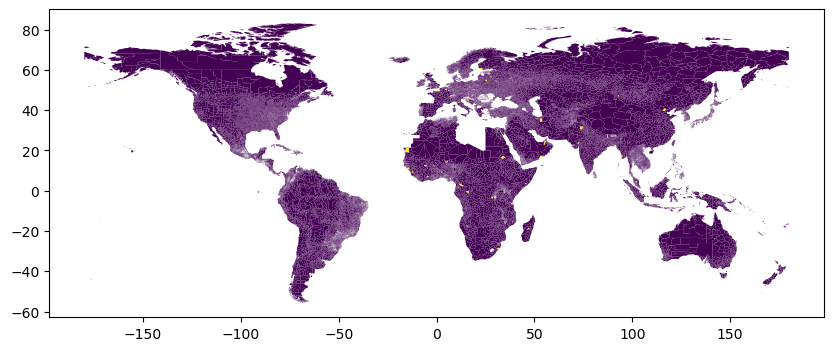

In [25]:
fig, ax = plt.subplots(figsize=(10,20))
gpd.GeoDataFrame(reg_fav_adm_2.query("year==2015")).plot(ax=ax, column="reg_fav", cmap="viridis")

---

In [5]:
import xarray as xr
import geopandas as gpd
from odc.geo.xr import ODCExtensionDa

plad_xr = xr.open_zarr("/scicore/home/meiera/schulz0022/projects/growth-and-temperature/data_nobackup/plad/processed/stage_2/plad_adm1_panel.zarr", consolidated=False)

In [26]:
from odc.geo.geom import Geometry

#cities = gpd.read_file("/scicore/home/meiera/schulz0022/projects/growth-and-temperature/data_nobackup/misc/raw/cities/urbanspatial-guppd-v1-gpkg.gpkg", engine = "pyogrio", layer="urbanspatial_guppd_v1_polygons")
countries = gpd.read_file("/scicore/home/meiera/schulz0022/projects/growth-and-temperature/data_nobackup/misc/processed/stage_1/gadm/gadm_levelADM_0_simplified.gpkg")
subset_geom = Geometry(countries.query("GID_0=='CHE'").geometry.iloc[0], crs=4326)

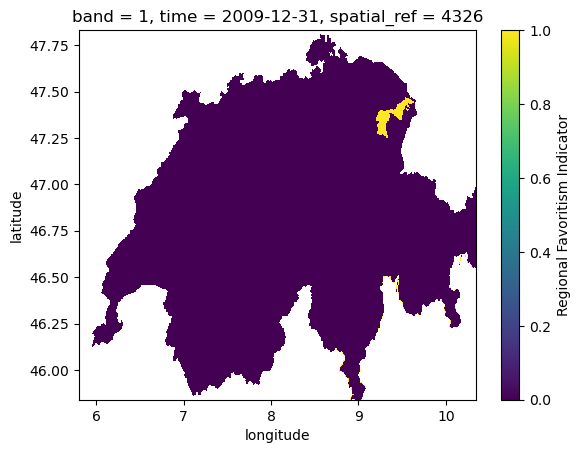

In [38]:
plad_xr.reg_fav.isel(time=17).odc.assign_crs(4326).odc.crop(subset_geom).compute().squeeze().plot.imshow()

---

In [12]:
import pandas as pd
test_data = pd.read_parquet("/scicore/home/meiera/schulz0022/projects/growth-and-temperature/data_nobackup/assembled/modis.parquet/ix=10/iy=11/data.parquet")

In [13]:
test_data["reg_fav"]

83392512    False
83392513    False
83392514     True
83392515     True
83392516     True
            ...  
88042369    False
88042370    False
88042371    False
88042372    False
88042373    False
Name: reg_fav, Length: 203175, dtype: bool